In [2]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [3]:
!unzip "/content/drive/MyDrive/data.zip"

Streaming output truncated to the last 5000 lines.
  inflating: data/traindev/copy-moved/images/c_0981.tif  
  inflating: data/traindev/copy-moved/images/c_0982.tif  
  inflating: data/traindev/copy-moved/images/c_0983.tif  
  inflating: data/traindev/copy-moved/images/c_0984.jpg  
  inflating: data/traindev/copy-moved/images/c_0985.jpg  
  inflating: data/traindev/copy-moved/images/c_0986.tif  
  inflating: data/traindev/copy-moved/images/c_0987.tif  
  inflating: data/traindev/copy-moved/images/c_0988.jpg  
  inflating: data/traindev/copy-moved/images/c_0989.tif  
  inflating: data/traindev/copy-moved/images/c_0990.jpg  
  inflating: data/traindev/copy-moved/images/c_0991.tif  
  inflating: data/traindev/copy-moved/images/c_0992.tif  
  inflating: data/traindev/copy-moved/images/c_0993.jpg  
  inflating: data/traindev/copy-moved/images/c_0994.tif  
  inflating: data/traindev/copy-moved/images/c_0995.jpg  
  inflating: data/traindev/copy-moved/images/c_0996.tif  
  inflating: data/tra

In [4]:
 #Import Libraries

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from PIL import Image
import matplotlib
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.models import *
from keras.layers import *
from keras.callbacks import *
from tensorflow.keras.optimizers import *
from tqdm import tqdm
import cv2
%load_ext tensorboard
import datetime
from keras.utils.vis_utils import plot_model

In [5]:
fake_image_data={'image_path':[],'label':[],'image_id':[]}


In [14]:
import os
fake_image_data_train={'image_path':[],'label':[],'image_id':[]}
fake_image_path='/content/data/train/copy-moved/images'
for img in os.listdir(fake_image_path) :
    temp_path=fake_image_path+"/"+str(img)
    fake_image_data_train['image_path'].append(temp_path)
    fake_image_data_train['label'].append('fake')
    fake_image_data_train['image_id'].append(img[:-4])

In [15]:
fake_image_data_train=pd.DataFrame(fake_image_data_train)
fake_image_data_train.head()

,image_path,label,image_id
0,/content/data/train/copy-moved/images/c_0668.jpg,fake,c_0668
1,/content/data/train/copy-moved/images/c_0415.tif,fake,c_0415
2,/content/data/train/copy-moved/images/c_1165.jpg,fake,c_1165
3,/content/data/train/copy-moved/images/c_0324.tif,fake,c_0324
4,/content/data/train/copy-moved/images/c_0305.tif,fake,c_0305


In [16]:
fake_image_data_train.sort_values(by='image_id', ascending=True, inplace=True)
fake_image_data_train.head()

,image_path,label,image_id
1161,/content/data/train/copy-moved/images/c_0001.tif,fake,c_0001
1115,/content/data/train/copy-moved/images/c_0002.jpg,fake,c_0002
950,/content/data/train/copy-moved/images/c_0003.jpg,fake,c_0003
1135,/content/data/train/copy-moved/images/c_0004.jpg,fake,c_0004
1279,/content/data/train/copy-moved/images/c_0005.jpg,fake,c_0005


In [17]:
import os
fake_image_data_test={'image_path':[],'label':[],'image_id':[]}
fake_image_path='/content/data/test/copy-moved/images'
for img in os.listdir(fake_image_path) :
    temp_path=fake_image_path+"/"+str(img)
    fake_image_data_test['image_path'].append(temp_path)
    fake_image_data_test['label'].append('fake')
    fake_image_data_test['image_id'].append(img[:-4])

In [18]:
fake_image_data_test=pd.DataFrame(fake_image_data_test)
fake_image_data_test.head()

,image_path,label,image_id
0,/content/data/test/copy-moved/images/c_0021.tif,fake,c_0021
1,/content/data/test/copy-moved/images/c_0006.tif,fake,c_0006
2,/content/data/test/copy-moved/images/c_0069.tif,fake,c_0069
3,/content/data/test/copy-moved/images/c_0136.jpg,fake,c_0136
4,/content/data/test/copy-moved/images/c_0014.jpg,fake,c_0014


In [19]:
fake_image_data_test.sort_values(by='image_id', ascending=True, inplace=True)
fake_image_data_test.head()

,image_path,label,image_id
133,/content/data/test/copy-moved/images/c_0001.tif,fake,c_0001
128,/content/data/test/copy-moved/images/c_0002.jpg,fake,c_0002
27,/content/data/test/copy-moved/images/c_0003.tif,fake,c_0003
93,/content/data/test/copy-moved/images/c_0004.tif,fake,c_0004
109,/content/data/test/copy-moved/images/c_0005.tif,fake,c_0005


In [20]:
fake_image_mask_train={'image_id':[],'mask_image_path':[]}
fake_image_mask_path='/content/data/train/copy-moved/masks'
for file in os.listdir(fake_image_mask_path):
    temp_path=fake_image_mask_path+"/"+str(file)
    fake_image_mask_train['mask_image_path'].append(temp_path)
    fake_image_mask_train['image_id'].append(file[:-4])
fake_image_mask_train=pd.DataFrame(fake_image_mask_train)
fake_image_mask_train.tail()

,image_id,mask_image_path
1489,c_0360,/content/data/train/copy-moved/masks/c_0360.png
1490,c_0864,/content/data/train/copy-moved/masks/c_0864.png
1491,c_0660,/content/data/train/copy-moved/masks/c_0660.png
1492,c_0252,/content/data/train/copy-moved/masks/c_0252.png
1493,c_0666,/content/data/train/copy-moved/masks/c_0666.png


In [21]:
fake_image_mask_train.sort_values(by='image_id', ascending=True, inplace=True)
fake_image_mask_train.head()

,image_id,mask_image_path
149,c_0001,/content/data/train/copy-moved/masks/c_0001.png
1248,c_0002,/content/data/train/copy-moved/masks/c_0002.png
1213,c_0003,/content/data/train/copy-moved/masks/c_0003.png
683,c_0004,/content/data/train/copy-moved/masks/c_0004.png
318,c_0005,/content/data/train/copy-moved/masks/c_0005.png


In [22]:
fake_image_mask_test={'image_id':[],'mask_image_path':[]}
fake_image_mask_path='/content/data/test/copy-moved/masks'
for file in os.listdir(fake_image_mask_path):
    temp_path=fake_image_mask_path+"/"+str(file)
    fake_image_mask_test['mask_image_path'].append(temp_path)
    fake_image_mask_test['image_id'].append(file[:-4])
fake_image_mask_test=pd.DataFrame(fake_image_mask_test)
fake_image_mask_test.tail()

,image_id,mask_image_path
161,c_0159,/content/data/test/copy-moved/masks/c_0159.png
162,c_0032,/content/data/test/copy-moved/masks/c_0032.png
163,c_0131,/content/data/test/copy-moved/masks/c_0131.png
164,c_0090,/content/data/test/copy-moved/masks/c_0090.png
165,c_0033,/content/data/test/copy-moved/masks/c_0033.png


In [23]:
fake_image_mask_test.sort_values(by='image_id', ascending=True, inplace=True)
fake_image_mask_test.head()

,image_id,mask_image_path
13,c_0001,/content/data/test/copy-moved/masks/c_0001.png
143,c_0002,/content/data/test/copy-moved/masks/c_0002.png
138,c_0003,/content/data/test/copy-moved/masks/c_0003.png
80,c_0004,/content/data/test/copy-moved/masks/c_0004.png
35,c_0005,/content/data/test/copy-moved/masks/c_0005.png


In [24]:
fake_image_data_train = fake_image_data_train.merge(fake_image_mask_train, on='image_id')

In [25]:
fake_image_data_test = fake_image_data_test.merge(fake_image_mask_test, on='image_id')

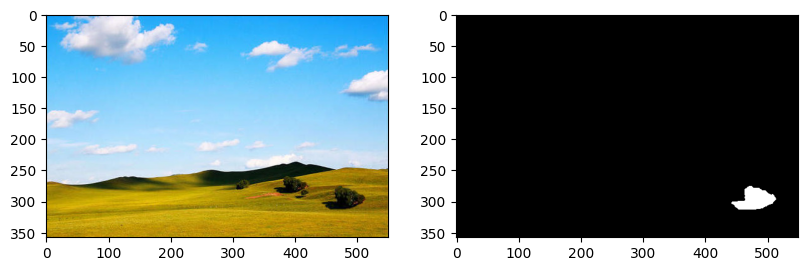

In [26]:
#Let's look at one example
ran_num=np.random.randint(0,fake_image_data_train.shape[0])
fig=plt.figure(figsize=(15,15))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
temp_arr=Image.open(fake_image_data_train.iloc[ran_num]['image_path'])
temp_mask_arr=cv2.imread(fake_image_data_train.iloc[ran_num]['mask_image_path'],0)
ax1.imshow(temp_arr)
ax2.imshow(temp_mask_arr,cmap='gray')

In [27]:
def change_pixel_value(A) :
    if len(A.shape)==3 :
        A=A[:,:,0]
    #Intilize a array B
    B=np.zeros((A.shape[0],A.shape[1]))
    for i in range(A.shape[0]) :
        for j in range(A.shape[1]) :
            if A[i][j]==255 :
                B[i][j]=0.0
            else :
                B[i][j]=1.0
    return B

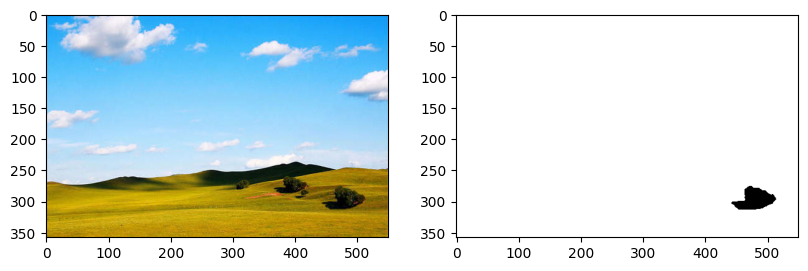

In [28]:
fig=plt.figure(figsize=(15,15))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
temp_mask_arr_mod=change_pixel_value(temp_mask_arr)
ax1.imshow(temp_arr)
ax2.imshow(temp_mask_arr_mod,cmap='gray')

**SRM filter**

In [29]:
import numpy as np
q = [4.0, 12.0, 2.0]
filter1 = [[0, 0, 0, 0, 0],
           [0, -1, 2, -1, 0],
           [0, 2, -4, 2, 0],
           [0, -1, 2, -1, 0],
           [0, 0, 0, 0, 0]]
filter2 = [[-1, 2, -2, 2, -1],
           [2, -6, 8, -6, 2],
           [-2, 8, -12, 8, -2],
           [2, -6, 8, -6, 2],
           [-1, 2, -2, 2, -1]]
filter3 = [[0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0],
           [0, 1, -2, 1, 0],
           [0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0]]


filter1 = np.asarray(filter1, dtype=float) / q[0]
filter2 = np.asarray(filter2, dtype=float) / q[1]
filter3 = np.asarray(filter3, dtype=float) / q[2]

filters = filter1+filter2+filter3

**Custom Generator**

In [30]:
class Dataset:
    def __init__(self, data):
        self.image_path = []
        self.mask_image_path = []

        for index,rows in data.iterrows() :
            self.image_path.append(rows['image_path'])
            self.mask_image_path.append(rows['mask_image_path'])


    def __getitem__(self, i):
        #Load images
        img=cv2.imread(self.image_path[i],cv2.IMREAD_UNCHANGED)
        mask_img=cv2.imread(self.mask_image_path[i],0)
        #Converting image to 256,256,3
        #after analyzing i found a single image with 256*256*4
        if img.shape[-1]!=3 :
            img=cv2.resize(img[:,:,:3],(512,512))
        else :
            img=cv2.resize(img,(512,512))
        #Converting mask image into 256*256
        #We observe some image are 2-d only some are 3-d
        if len(mask_img.shape)==2 :
            mask_img=cv2.resize(mask_img,(512,512))
        else :
            mask_img=cv2.resize(mask_img[:,:,0],(512,512))

        #Processed image
        preprocess_img=cv2.filter2D(img,-1,filters)
        #process mask image
        mask_img_mod=change_pixel_value(mask_img)




        return img,preprocess_img,mask_img_mod


    def __len__(self): # your model.fit_gen requires this function
        return len(self.image_path)


class Dataloder(tf.keras.utils.Sequence):
    def __init__(self, dataset, batch_size=1,shuffle=False):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle=shuffle
        self.indexes = np.arange(len(self.dataset.image_path))


    def __getitem__(self, i):
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])

        #batch = [for samples in zip(*data)]
        batch = [np.stack(samples, axis=0) for samples in zip(*data)]
        batch[2]=batch[2].reshape((self.batch_size,512,512,1))

        return tuple([[batch[0],batch[1]],batch[2]])

    def __len__(self):  # your model.fit_gen requires this function
        return len(self.indexes) // self.batch_size

    def on_epoch_end(self):
        self.indexes = np.random.permutation(self.indexes)

train_dataset=Dataset(fake_image_data_train)
train_dataloader = Dataloder(train_dataset, batch_size=8,shuffle=True)

In [31]:
test_dataset=Dataset(fake_image_data_test)
test_dataloader = Dataloder(test_dataset, batch_size=8,shuffle=True)

**Model Compling And Training**

In [32]:
def conv2d_block(input_dim, n_filters, kernel_size=3, batchnorm=True):
    x = Conv2D(filters=n_filters, kernel_size=(kernel_size, kernel_size), kernel_initializer="he_normal",padding="same") (input_dim)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(filters=n_filters, kernel_size=(kernel_size, kernel_size), kernel_initializer="he_normal",padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    return x

#This part is for input image

input_img = Input((512, 512, 3))
# contracting path
conv11 = conv2d_block(input_img, n_filters=16, kernel_size=3, batchnorm=True)
pool11 = MaxPooling2D((2, 2)) (conv11)
pool11 = Dropout(0.5)(pool11)
conv12 = conv2d_block(pool11, n_filters=32, kernel_size=3, batchnorm=True)
pool12 = MaxPooling2D((2, 2)) (conv12)
pool12 = Dropout(0.5)(pool12)
conv13 = conv2d_block(pool12, n_filters=64, kernel_size=3, batchnorm=True)
pool13 = MaxPooling2D((2, 2)) (conv13)
pool13 = Dropout(0.5)(pool13)
conv14 = conv2d_block(pool13, n_filters=128, kernel_size=3, batchnorm=True)
pool14 = MaxPooling2D(pool_size=(2, 2)) (conv14)
pool14 = Dropout(0.5)(pool14)
conv15 = conv2d_block(pool14, n_filters=256, kernel_size=3, batchnorm=True)
#Expanding path
u6 = Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same') (conv15)
#skip_connections
u6 = concatenate([u6, conv14])
u6 = Dropout(0.5)(u6)
c6 = conv2d_block(u6, n_filters=128, kernel_size=3, batchnorm=True)
u7 = Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, conv13])
u7 = Dropout(0.5)(u7)
c7 = conv2d_block(u7, n_filters=64, kernel_size=3, batchnorm=True)
u8 = Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, conv12])
u8 = Dropout(0.5)(u8)
c8 = conv2d_block(u8, n_filters=32, kernel_size=3, batchnorm=True)
u9 = Conv2DTranspose(16, (3, 3), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, conv11], axis=3)
u9 = Dropout(0.5)(u9)
c9 = conv2d_block(u9, n_filters=16, kernel_size=3, batchnorm=True)

output = Conv2D(3, (1, 1), activation='sigmoid') (c9)


#This part is for SRM filter output image

input_img_filter = Input((512, 512, 3))

# contracting path
conv21 = conv2d_block(input_img_filter, n_filters=16, kernel_size=3, batchnorm=True)
pool21 = MaxPooling2D((2, 2)) (conv21)
pool21 = Dropout(0.5)(pool21)
conv22 = conv2d_block(pool21, n_filters=32, kernel_size=3, batchnorm=True)
pool22 = MaxPooling2D((2, 2)) (conv22)
pool22 = Dropout(0.5)(pool22)
conv23 = conv2d_block(pool22, n_filters=64, kernel_size=3, batchnorm=True)
pool23 = MaxPooling2D((2, 2)) (conv23)
pool23 = Dropout(0.5)(pool23)
conv24 = conv2d_block(pool23, n_filters=128, kernel_size=3, batchnorm=True)
pool24 = MaxPooling2D(pool_size=(2, 2)) (conv24)
pool24 = Dropout(0.5)(pool24)
conv25 = conv2d_block(pool24, n_filters=256, kernel_size=3, batchnorm=True)
#Expanding path
u6 = Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same') (conv25)
#skip_connections
u6 = concatenate([u6, conv24])
u6 = Dropout(0.5)(u6)
c6 = conv2d_block(u6, n_filters=128, kernel_size=3, batchnorm=True)
u7 = Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, conv23])
u7 = Dropout(0.5)(u7)
c7 = conv2d_block(u7, n_filters=64, kernel_size=3, batchnorm=True)
u8 = Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, conv22])
u8 = Dropout(0.5)(u8)
c8 = conv2d_block(u8, n_filters=32, kernel_size=3, batchnorm=True)
u9 = Conv2DTranspose(16, (3, 3), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, conv11], axis=3)
u9 = Dropout(0.5)(u9)
c9 = conv2d_block(u9, n_filters=16, kernel_size=3, batchnorm=True)

output_filter = Conv2D(3, (1, 1), activation='sigmoid') (c9)

combined = concatenate([output, output_filter])
outputs = Conv2D(1, (1, 1), activation='sigmoid') (combined)

model = Model(inputs=[input_img,input_img_filter], outputs=[outputs])

In [33]:
def scheduler(epoch,lr) :
  if epoch%5==0 :
    lr=0.9*lr

  return lr

In [34]:
lrScheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [35]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

In [37]:
model.fit_generator(train_dataloader,validation_data=test_dataloader, steps_per_epoch=5,epochs=1,callbacks=[lrScheduler,tensorboard_callback])


5/5 [==============================] - 830s 187s/step - loss: 0.3116 - accuracy: 0.9620 - val_loss: 0.4342 - val_accuracy: 0.9379 - lr: 8.1000e-04


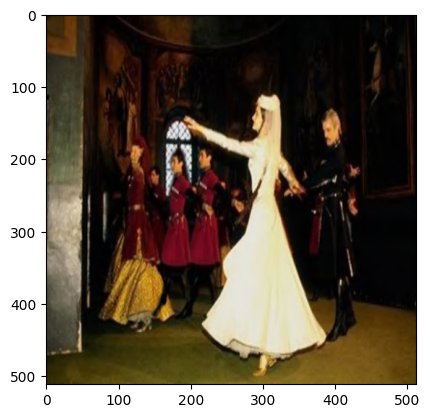

In [111]:
ran_num=np.random.randint(0,fake_image_data_train.shape[0])
image_arr=np.array(Image.open(fake_image_data_train.iloc[ran_num]['image_path']))
mask_arr=np.array(Image.open(fake_image_data_train.iloc[ran_num]['mask_image_path']))
mask_arr_mod=change_pixel_value(mask_arr)
img_arr=cv2.resize(image_arr,(512,512))
preprocess_img=cv2.filter2D(img_arr,-1,filters)
preprocess_img=cv2.resize(preprocess_img,(512,512))
img_arr=img_arr.reshape(1,512,512,3)
preprocess_img=preprocess_img.reshape(1,512,512,3)
plt.imshow(img_arr[0])

In [113]:
pred=model.predict([img_arr,preprocess_img])[0]
pred=pred.reshape(512,512)

1/1 [==============================] - 2s 2s/step


In [114]:
pred

array([[0.7484155 , 0.74588543, 0.7492199 , ..., 0.7580236 , 0.75066614,
        0.74796104],
       [0.74306923, 0.7272205 , 0.72655374, ..., 0.7085627 , 0.7209435 ,
        0.7273431 ],
       [0.7569258 , 0.7339403 , 0.75536776, ..., 0.7123141 , 0.7227801 ,
        0.73491865],
       ...,
       [0.7422733 , 0.7150977 , 0.728535  , ..., 0.6546244 , 0.707303  ,
        0.7264862 ],
       [0.7528611 , 0.7360803 , 0.75530016, ..., 0.6920509 , 0.72763723,
        0.687404  ],
       [0.75745463, 0.7454617 , 0.74688977, ..., 0.7351794 , 0.73115087,
        0.74355936]], dtype=float32)

In [116]:
for i in range(pred.shape[0]) :
    for j in range(pred.shape[1]) :
        if pred[i][j]>0.70 :
            pred[i][j]=1.0
        else :
            pred[i][j]=0.0

In [117]:
pred

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 0., 1., 0.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

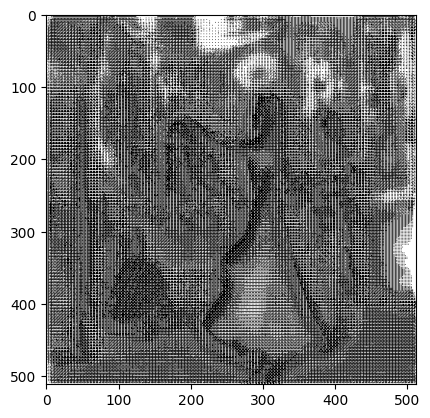

In [118]:
plt.imshow(pred,cmap='gray')

In [110]:
model_json = model.to_json()
with open('phase2_move.json', 'w') as json_file:
    json_file.write(model_json)

# Save model weights in H5 format
model.save_weights('phase2_move_weights.h5')